In [1]:
import pandas as pd
import numpy as np
import torch
import json
from normalizer import counter
from torch.utils.data import DataLoader
from normalizer import getDataFromJSON, subSample, trainer, tester, getTotalAccuracy, cfvalidation
import torch.nn as nn
from skorch import NeuralNet

device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/robjohnson/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


## Load the Data ##

In [2]:
# This file has 77270 data points. 
%time train1, labels1 = subSample(path="data/train_partition1_data.json", earlyStop=10000, device=device)

Now reading data/train_partition1_data.json
Now loading event 1/785
Now loading event 101/785
Now loading event 201/785
Now loading event 301/785
Now loading event 401/785
Now loading event 501/785
Now loading event 601/785
Now loading event 701/785
785 lines loaded.
CPU times: user 20.9 s, sys: 1.82 s, total: 22.7 s
Wall time: 22.8 s


In [3]:
# This file has 93767 data points. 
%time train2, labels2 = subSample(path="data/train_partition2_data.json", earlyStop=10000, device=device)

Now reading data/train_partition2_data.json
Now loading event 1/300
Now loading event 101/300
Now loading event 201/300
300 lines loaded.
CPU times: user 17.1 s, sys: 2.28 s, total: 19.4 s
Wall time: 19.4 s


In [4]:
# This file has 42986 data points. 
%time train3, labels3 = subSample(path="data/train_partition3_data.json", earlyStop=10000, device=device)

Now reading data/train_partition3_data.json
Now loading event 1/585
Now loading event 101/585
Now loading event 201/585
Now loading event 301/585
Now loading event 401/585
Now loading event 501/585
585 lines loaded.
CPU times: user 13.6 s, sys: 948 ms, total: 14.5 s
Wall time: 14.5 s


In [5]:
train2[0,0]

tensor([0.2276, 0.2299, 0.2297, 0.2289, 0.2352, 0.2320, 0.2322, 0.2785, 0.2814,
        0.2332, 0.2302, 0.2265, 0.2242, 0.2219, 0.2189, 0.2208, 0.2201, 0.2190,
        0.2221, 0.2199, 0.2218, 0.2223, 0.2240, 0.2239, 0.2226, 0.2229, 0.2243,
        0.2249, 0.2246, 0.2248, 0.2239, 0.2244, 0.2278, 0.2291, 0.2274, 0.2281,
        0.2255, 0.2249, 0.2246, 0.2205, 0.2238, 0.2227, 0.2196, 0.2201, 0.2216,
        0.2172, 0.2197, 0.2194, 0.2202, 0.2172, 0.2154, 0.2151, 0.2128, 0.2133,
        0.2096, 0.2093, 0.2109, 0.2134, 0.2117, 0.2134])

## Define the network ##

This network has two parts - the stack and the fully connected layers. The stack interprets a given measurement and then outputs from 60 to a given number of entries. The fully connected part then makes a prediction off of all of that.

In [6]:
# Define a network that takes each individual time series as input and outputs an nx33 tensor

class stack(nn.Module):
    def __init__(self, n):
        super().__init__() 
        self.n = n
        self.layer00 = nn.Linear(60,n)
        self.layer01 = nn.Linear(60,n)
        self.layer02 = nn.Linear(60,n)
        self.layer03 = nn.Linear(60,n)
        self.layer04 = nn.Linear(60,n)
        self.layer05 = nn.Linear(60,n)
        self.layer06 = nn.Linear(60,n)
        self.layer07 = nn.Linear(60,n)
        self.layer08 = nn.Linear(60,n)
        self.layer09 = nn.Linear(60,n)
        self.layer10 = nn.Linear(60,n)
        self.layer11 = nn.Linear(60,n)
        self.layer12 = nn.Linear(60,n)
        self.layer13 = nn.Linear(60,n)
        self.layer14 = nn.Linear(60,n)
        self.layer15 = nn.Linear(60,n)
        self.layer16 = nn.Linear(60,n)
        self.layer17 = nn.Linear(60,n)
        self.layer18 = nn.Linear(60,n)
        self.layer19 = nn.Linear(60,n)
        self.layer20 = nn.Linear(60,n)
        self.layer21 = nn.Linear(60,n)
        self.layer22 = nn.Linear(60,n)
        self.layer23 = nn.Linear(60,n)
        self.layer24 = nn.Linear(60,n)
        self.layer25 = nn.Linear(60,n)
        self.layer26 = nn.Linear(60,n)
        self.layer27 = nn.Linear(60,n)
        self.layer28 = nn.Linear(60,n)
        self.layer29 = nn.Linear(60,n)
        self.layer30 = nn.Linear(60,n)
        self.layer31 = nn.Linear(60,n)
        self.layer32 = nn.Linear(60,n)
        

    def forward(self, x):
        output = torch.zeros(x.shape[0], 33, self.n)
        output[:,0,:] = self.layer00(x[:,0,:])
        output[:,1,:] = self.layer01(x[:,1,:])
        output[:,2,:] = self.layer02(x[:,2,:])
        output[:,3,:] = self.layer03(x[:,3,:])
        output[:,4,:] = self.layer04(x[:,4,:])
        output[:,5,:] = self.layer05(x[:,5,:])
        output[:,6,:] = self.layer06(x[:,6,:])
        output[:,7,:] = self.layer07(x[:,7,:])
        output[:,8,:] = self.layer08(x[:,8,:])
        output[:,9,:] = self.layer09(x[:,9,:])
        
        output[:,10,:] = self.layer00(x[:,10,:])
        output[:,11,:] = self.layer00(x[:,11,:])
        output[:,12,:] = self.layer00(x[:,12,:])
        output[:,13,:] = self.layer00(x[:,13,:])
        output[:,14,:] = self.layer00(x[:,14,:])
        output[:,15,:] = self.layer00(x[:,15,:])
        output[:,16,:] = self.layer00(x[:,16,:])
        output[:,17,:] = self.layer00(x[:,17,:])
        output[:,18,:] = self.layer00(x[:,18,:])
        output[:,19,:] = self.layer00(x[:,19,:])
        
        output[:,20,:] = self.layer00(x[:,20,:])
        output[:,21,:] = self.layer00(x[:,21,:])
        output[:,22,:] = self.layer00(x[:,22,:])
        output[:,23,:] = self.layer00(x[:,23,:])
        output[:,24,:] = self.layer00(x[:,24,:])
        output[:,25,:] = self.layer00(x[:,25,:])
        output[:,26,:] = self.layer00(x[:,26,:])
        output[:,27,:] = self.layer00(x[:,27,:])
        output[:,28,:] = self.layer00(x[:,28,:])
        output[:,29,:] = self.layer00(x[:,29,:])
        
        output[:,30,:] = self.layer00(x[:,30,:])
        output[:,31,:] = self.layer00(x[:,31,:])
        output[:,32,:] = self.layer00(x[:,32,:])
        
        return output


In [7]:
# Define the network. Make sure to end with nn.Softmax activation    
    
class CNNinspired(nn.Module):
    def __init__(self, n, hidden_size, num_classes=5, drop1=.5):
        super().__init__() 
        self.n = n
        self.layer1 = stack(n)
        self.layer2 = nn.Linear(n*33, hidden_size)
        self.layerout = nn.Linear(hidden_size, num_classes)
        #Define a RELU Activation unit
        self.relu = nn.ReLU()  
        self.sig = nn.Sigmoid()
        self.smax = nn.Softmax(dim=1)
        self.drop = nn.Dropout(p=drop1)
        self.b = True

    def forward(self, x):
        #Forward Propagate through the layers as defined above
        output = self.layer1(x)
        if self.b:
            self.out = output
            self.b = False
#         print(x.shape)
#         print('This is iffy')
#         print(output.shape)
#         assert False
        y = self.sig( output.reshape(-1, 33*self.n))
        y = self.relu(self.layer2(y))
        y = self.smax(self.layerout(y))
        return y 


## Begin testing with three fold validation ##

In [8]:
modelArgs = [3, 128]
modelKwargs = {'drop1':.25}
trainKwargs = {'epochs':50, 'lr' : 0.01}
# Attempted learing rates: 
# 0.00001 - one in a million change
# 0.000001 - one in 10 million
# 0.0001 - one in 100 thousand
# 0.001 with 128 hidden neurons instead of 30 - one in 10 thousand

    # model1 = CNNinspired(1, 30)
    # model3 = CNNinspired(3, 30)

The training loss for epoch 1/50 was 1.6093676020117367
The total balanced accuracy for validation was 0.2
The validation loss was :   1/50 was 1.6092851223089757
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 2/50 was 1.609345842810238
The total balanced accuracy for validation was 0.2
The validation loss was :   2/50 was 1.609263818895715
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 3/50 was 1.6093250092338114
The total balanced accuracy for validation was 0.2
The validation loss was :   3/50 was 1.6092432657877604
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 4/50 was 1.6093051503686344
The total balanced accuracy for validation was 0.2
The 

The training loss for epoch 29/50 was 1.6088772100560806
The total balanced accuracy for validation was 0.2
The validation loss was :   29/50 was 1.6087805754099136
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 30/50 was 1.6088604646570541
The total balanced accuracy for validation was 0.2
The validation loss was :   30/50 was 1.6087629947906885
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 31/50 was 1.6088436140733606
The total balanced accuracy for validation was 0.2
The validation loss was :   31/50 was 1.6087452201761752
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 32/50 was 1.6088267494650448
The total balanced accuracy for validation was

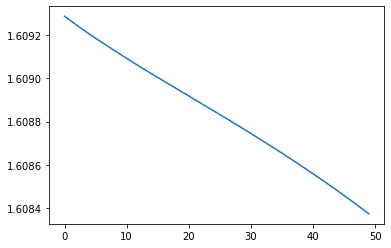

CPU times: user 1min 13s, sys: 5.56 s, total: 1min 19s
Wall time: 1min 8s


In [9]:
train1Args = [CNNinspired, torch.cat((train1, train2), dim=0), labels1 + labels2, None, train3, labels3, None]
%time train12 = trainer(*train1Args, *modelArgs, **trainKwargs, **modelKwargs)

The training loss for epoch 1/50 was 1.6097854538397356
The total balanced accuracy for validation was 0.2
The validation loss was :   1/50 was 1.6094883894920349
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 2/50 was 1.6096908775242893
The total balanced accuracy for validation was 0.2
The validation loss was :   2/50 was 1.6093925289312998
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 3/50 was 1.6095940308137373
The total balanced accuracy for validation was 0.2
The validation loss was :   3/50 was 1.6093101998170216
The unbalanced validation accuracy is 0.2
The accuracy for each is [0.0, 0.0, 0.0, 1.0, 0.0]


=============End Epoch==============


The training loss for epoch 4/50 was 1.6095119010318408
The total balanced accuracy for validation was 0.2
Th

The training loss for epoch 28/50 was 1.608416411009702
The total balanced accuracy for validation was 0.39
The validation loss was :   28/50 was 1.6082297825813294
The unbalanced validation accuracy is 0.39
The accuracy for each is [1.0, 0.0, 0.0, 0.95, 0.0]


=============End Epoch==============


The training loss for epoch 29/50 was 1.6083803122693843
The total balanced accuracy for validation was 0.39
The validation loss was :   29/50 was 1.6081955389181772
The unbalanced validation accuracy is 0.39
The accuracy for each is [1.0, 0.0, 0.0, 0.95, 0.0]


=============End Epoch==============


The training loss for epoch 30/50 was 1.6083444519476457
The total balanced accuracy for validation was 0.39
The validation loss was :   30/50 was 1.6081614939371744
The unbalanced validation accuracy is 0.39
The accuracy for each is [1.0, 0.0, 0.0, 0.95, 0.0]


=============End Epoch==============


The training loss for epoch 31/50 was 1.6083083152770996
The total balanced accuracy for valida

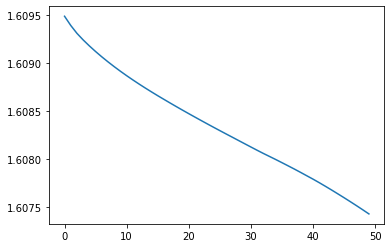

In [10]:
train13 = trainer(
    CNNinspired,
    torch.cat((train1, train3), dim=0),
    labels1 + labels3,
    None,
    train2,
    labels2,
    None,
    *modelArgs,
    **trainKwargs,
    **modelKwargs
)

The training loss for epoch 1/50 was 1.6099638513156347
The total balanced accuracy for validation was 0.19745222929936307
The validation loss was :   1/50 was 1.6098371683412296
The unbalanced validation accuracy is 0.19745222929936307
The accuracy for each is [0.0, 0.006369426751592357, 0.0, 0.9808917197452229, 0.0]


=============End Epoch==============


The training loss for epoch 2/50 was 1.6098855478422982
The total balanced accuracy for validation was 0.19745222929936307
The validation loss was :   2/50 was 1.609778178573414
The unbalanced validation accuracy is 0.19745222929936307
The accuracy for each is [0.0, 0.006369426751592357, 0.0, 0.9808917197452229, 0.0]


=============End Epoch==============


The training loss for epoch 3/50 was 1.6098272715296065
The total balanced accuracy for validation was 0.19745222929936307
The validation loss was :   3/50 was 1.609735098158478
The unbalanced validation accuracy is 0.19745222929936307
The accuracy for each is [0.0, 0.0, 0.00636

The training loss for epoch 24/50 was 1.6093703252928597
The total balanced accuracy for validation was 0.25605095541401274
The validation loss was :   24/50 was 1.6093593656637106
The unbalanced validation accuracy is 0.25605095541401274
The accuracy for each is [0.0, 0.0, 0.43312101910828027, 0.8471337579617835, 0.0]


=============End Epoch==============


The training loss for epoch 25/50 was 1.6093516179493494
The total balanced accuracy for validation was 0.2535031847133758
The validation loss was :   25/50 was 1.6093430355096319
The unbalanced validation accuracy is 0.2535031847133758
The accuracy for each is [0.0, 0.0, 0.445859872611465, 0.821656050955414, 0.0]


=============End Epoch==============


The training loss for epoch 26/50 was 1.6093328510011946
The total balanced accuracy for validation was 0.24585987261146497
The validation loss was :   26/50 was 1.6093267176561294
The unbalanced validation accuracy is 0.24585987261146497
The accuracy for each is [0.0, 0.0, 0.4649

The training loss for epoch 47/50 was 1.6089283909116472
The total balanced accuracy for validation was 0.32993630573248406
The validation loss was :   47/50 was 1.6089708477068858
The unbalanced validation accuracy is 0.32993630573248406
The accuracy for each is [0.7261146496815286, 0.0, 0.5859872611464968, 0.3375796178343949, 0.0]


=============End Epoch==============


The training loss for epoch 48/50 was 1.6089082189968653
The total balanced accuracy for validation was 0.31974522292993635
The validation loss was :   48/50 was 1.6089529004066614
The unbalanced validation accuracy is 0.3197452229299363
The accuracy for each is [0.8089171974522293, 0.0, 0.47770700636942676, 0.31210191082802546, 0.0]


=============End Epoch==============


The training loss for epoch 49/50 was 1.6088878512382507
The total balanced accuracy for validation was 0.32101910828025476
The validation loss was :   49/50 was 1.6089349031448363
The unbalanced validation accuracy is 0.32101910828025476
The accu

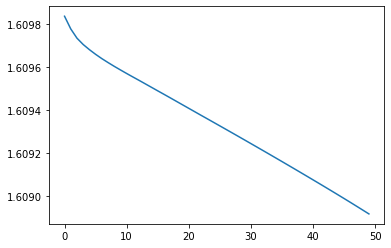

In [11]:
train23 = trainer(
    CNNinspired,
    torch.cat((train3, train2), dim=0),
    labels3 + labels2,
    None,
    train1,
    labels1,
    None,
    *modelArgs,
    **trainKwargs,
    **modelKwargs
)

In [13]:
        acc = getTotalAccuracy(train12, train23, train13, 
                       torch.cat((train1, train2, train3), dim=0),
                       labels1 + labels2 + labels3)
print('Average accuracy of all three models on all data: ', acc)

Average accuracy of all three models on all data:  0.22634730538922154


In [14]:
# def cfvalidation(tripList, module, x1, y1, x2, y2, x3, y3, **trainKwargs):
#         for (modelArgs, modelKwargs, lr) in tripList:
from normalizer import cfvalidation
ns = [1,3,5,7]
hls = [30, 128, 256]
margs = []
for n in ns:
    for h in hls:
        margs.append([n,h])
lrs = [10**i for i in range(0,-10, -1)]
drs = [0, .05, .25, .45, .5]
tripList = []
for ma in margs:
    for r in lrs:
        for d in drs:
            tripList.append([ma, {'drop1: d'} r])
lossArgs, quickArgs = cfvalidation(tripList, CNNinspired, train1, labels1, train2, labels2, train3, labels3, epochs=200)


SyntaxError: invalid syntax (<ipython-input-14-75557cec9d0a>, line 16)

## Final model creation for testing ##

Once acceptable hyperparameters have been established, run this code to train on all the data and print out a CSV that predicts from the test data.

In [ ]:
train123 = trainer(
    CNNinspired,
    torch.cat((train1, train2, train3), dim=0),
    labels1 + labels2 + labels3,
    None,
    torch.cat((train1, train2, train3), dim=0),
    labels1 + labels2 + labels3,
    None,
    *modelArgs,
    **trainKwargs,
    **modelKwargs
)

In [ ]:
# from datetime import datetime
# def tester(model, pathToWrite=None):
#     if pathToWrite is None:
#         pathToWrite = f'results/submission{datetime.now().strftime("%d_%H:%M")}.csv'
#     # Get test data
#     test, ids, _ = getDataFromJSON(path='data/test_4_5_data.json', test=True, device=device)
#     # get our guesses from the network
#     guesses = torch.argmax(model(test))
#     assert len(ids) == guesses.shape
#     # Open a file to write to
#     file = open(pathToWrite, mode='w')
#     print('Id,Label', file=file)
#     for i in range(len(ids)):
#         print(ids[i], guesses[i], sep=',', file=file)
    file.close()

tester(train123)

In [ ]:
from datetime import datetime
acc = 
PATH = f'savedModels/lr{lr}acc{acc}time{datetime.now().strftime("%d_%H:%M")}.pth'
torch.save(newModel.state_dict(), PATH)
print('REMEMBER TO DELETE YOUR ACCURACY SO THE NEXT PERSON REMEMBERS TO WRITE THEIRS')